In [1]:
#主要程式
def main():
    #輸入股票ID以查詢
    Stock_ID = input('input stock ID : ')
    Moving_Average(Stock_ID)
    return

In [2]:
 """
會使用twstock的原因是因為pandas的datareader對於一些下市的台灣股票查詢不方便
twstock在查詢上雖然較吃資源但支援台灣股票
"""
#base
import pandas as pd
import numpy
import matplotlib.pyplot as plt
%matplotlib inline
#使用twstock獲得歷史股價
import twstock
import datetime as datetime
#繪製K線圖用套件
import mpl_finance as mpf
from talib import abstract
from matplotlib import style

In [6]:
def Moving_Average(stock_ID):
    #獲得現在日期的一年內股價資訊
    date = datetime.datetime.now()
    try:
        df = pd.DataFrame(twstock.Stock(str(stock_ID)).fetch_from(date.year-1,date.month))
    except:
        print('Can\'t find this stock information, please confirm whether the stock ID is correct')
        return
    df.set_index('date',inplace=True)
    df.index = df.index.format(formatter=lambda x: x.strftime('%Y-%m-%d')) 
    #原本假日就不開放交易所以日期並不連貫，將可能因為股票停止交易日導致數值為nan值的列數刪除
    df = df.dropna(axis=0,how='any')
    
    #計算均線，五日(週線)、三十日(月線)和九十日(季線)
    sma_5 = abstract.SMA(df,5)  
    sma_30 = abstract.SMA(df,30)
    sma_90 = abstract.SMA(df,90)
    
    #繪製圖型
    fig = plt.figure(figsize=(24,8))
    plt.style.use('seaborn')
    fig.suptitle('Technical Analysis_%s'%stock_ID,color='tab:green')
    #fig.set_xlabel('Date',color='tab:blue')
       
    #K線圖
    ax = plt.subplot2grid((6,4), (1,0), rowspan=4, colspan=4) #使用grid函式分割圖表
    ax.set_xticks(range(0, len(df.index), 10)) #設定X軸的顯示範圍
    ax.set_xticklabels(df.index[::10],rotation=30)#rotation可以旋轉X軸的數值，指定角度
    ax.set_ylabel('Price', color='tab:blue')
    mpf.candlestick2_ohlc(ax, df['open'],df['high'], df['low'],
        df['close'], width=0.6, colorup='r', colordown='g', alpha=1); #蠟燭圖 *alpha可以設定透明度
    ax.plot(sma_5,label='5MA') #均線用線圖表示
    ax.plot(sma_30,label='30MA')
    ax.plot(sma_90,label='90MA')
    ax.tick_params(width=2,colors='tab:blue')
    ax.set_xlabel('date', color='tab:blue')
    plt.legend(loc='upper left')
    
    #RSI
    RSI = abstract.RSI(df)
    RSI = RSI.fillna(0)
    ax0 = plt.subplot2grid((6,4), (0,0), sharex=ax, rowspan=1, colspan=4)#將ax0放在ax上，使用grid函式，和ax使用同一個X軸
    plt.setp(ax0.get_xticklabels(), visible=False) #讓ax0的X軸不可視
    ax0.plot(RSI)
    ax0.axhline(70, color='r',alpha=0.5) #超買指標
    ax0.axhline(30, color='b',alpha=0.5) #超賣指標
    ax0.set_yticks([30,70])
    ax0.set_ylabel('RSI', color='tab:blue')
    ax0.tick_params(width=2,colors='tab:blue')
    
    #交易量
    ax2 = ax.twinx() #為了和K線圖在同一個圖行上顯示
    ax2.grid(False)
    ax2.set_xticks(range(0, len(df.index), 10))
    ax2.set_xticklabels(df.index[::10],rotation=30)
    ax2.bar(df.index,df['capacity'],alpha=0.5) #交易量顯示為長條圖 
    ax2.set_ylabel('Volume', color='tab:blue')
    ax2.tick_params(width=2,colors='tab:blue')
    plt.setp(ax2.get_xticklabels(), visible=False)#讓ax2的X軸不可視
    return

input stock ID :  0050


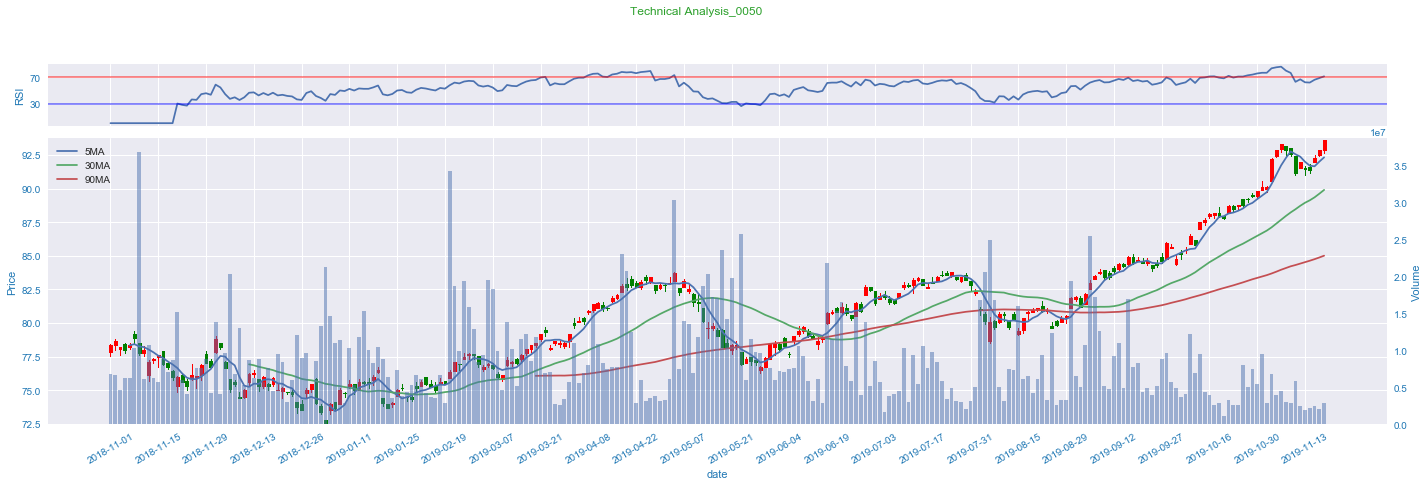

In [8]:
if __name__ == '__main__':
    main()